In [84]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
pd.set_option('display.max_columns', None)

# Read the 2 CSV Files


In [2]:
df = pd.read_csv('../data/matches.csv')

In [3]:
df2 = pd.read_csv('../data/deliveries.csv')

In [164]:
#Renaming Columns so as to be able to merge two files

In [4]:
df.rename(columns={"id":"match_id"},inplace=True)

In [94]:
df.head()

match_id  season       city        date                        team1  \
0         1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1         2    2017       Pune  2017-04-06               Mumbai Indians   
2         3    2017     Rajkot  2017-04-07                Gujarat Lions   
3         4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4         5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [85]:
df2.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN  
3           0              NaN            NaN     NaN  
4           2              NaN            NaN     NaN

# Getting the count of total runs by each team in a match 

In [91]:
 runCount = df2.groupby(['match_id', 'inning','batting_team'])['total_runs'].sum()

# Runs scored by Batting teams in each match 

In [92]:
runCount

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
          2       Royal Challengers Bangalore    172
2         1       Mumbai Indians                 184
          2       Rising Pune Supergiant         187
3         1       Gujarat Lions                  183
          2       Kolkata Knight Riders          184
4         1       Rising Pune Supergiant         163
          2       Kings XI Punjab                164
5         1       Royal Challengers Bangalore    157
          2       Delhi Daredevils               142
6         1       Gujarat Lions                  135
          2       Sunrisers Hyderabad            140
7         1       Kolkata Knight Riders          178
          2       Mumbai Indians                 180
8         1       Royal Challengers Bangalore    148
          2       Kings XI Punjab                150
9         1       Delhi Daredevils               205
          2       Rising Pune Supergiant         108


In [89]:
df.head()


match_id  season       city        date                        team1  \
0         1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1         2    2017       Pune  2017-04-06               Mumbai Indians   
2         3    2017     Rajkot  2017-04-07                Gujarat Lions   
3         4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4         5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [96]:
da = pd.DataFrame({'count' : df2.groupby(['match_id', 'inning','batting_team'])['total_runs'].sum()})

In [98]:
da.head()

count
match_id inning batting_team                      
1        1      Sunrisers Hyderabad            207
         2      Royal Challengers Bangalore    172
2        1      Mumbai Indians                 184
         2      Rising Pune Supergiant         187
3        1      Gujarat Lions                  183

In [100]:
da['count']

match_id  inning  batting_team               
1         1       Sunrisers Hyderabad            207
          2       Royal Challengers Bangalore    172
2         1       Mumbai Indians                 184
          2       Rising Pune Supergiant         187
3         1       Gujarat Lions                  183
          2       Kolkata Knight Riders          184
4         1       Rising Pune Supergiant         163
          2       Kings XI Punjab                164
5         1       Royal Challengers Bangalore    157
          2       Delhi Daredevils               142
6         1       Gujarat Lions                  135
          2       Sunrisers Hyderabad            140
7         1       Kolkata Knight Riders          178
          2       Mumbai Indians                 180
8         1       Royal Challengers Bangalore    148
          2       Kings XI Punjab                150
9         1       Delhi Daredevils               205
          2       Rising Pune Supergiant         108


In [102]:
df2.describe()

match_id         inning           over           ball  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean      318.281317       1.482188      10.142649       3.616483   
std       182.955531       0.501768       5.674338       1.807698   
min         1.000000       1.000000       1.000000       1.000000   
25%       161.000000       1.000000       5.000000       2.000000   
50%       319.000000       1.000000      10.000000       4.000000   
75%       476.000000       2.000000      15.000000       5.000000   
max       636.000000       4.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean        0.000538       0.037498       0.004885       0.022232   
std         0.023196       0.257398       0.114234       0.200104   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean        0.004340       0.000066       1.222445       0.069022   
std         0.072652       0.018229       1.594509       0.349667   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       6.000000       7.000000   

          total_runs  
count  150460.000000  
mean        1.291466  
std         1.583240  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         7.000000

# Different Innings of a Match & Super Over 

In [168]:
df2['inning'].unique()

array([1, 2, 3, 4], dtype=int64)

# Innings 3 & 4 means that there was a Super Over in Such Matches

In [103]:
superOver = df2.loc[df2['is_super_over'] == 1] 

In [104]:
superOver.head()

match_id  inning    batting_team   bowling_team  over  ball     batsman  \
8092        34       3  Mumbai Indians  Gujarat Lions     1     1  JC Buttler   
8093        34       3  Mumbai Indians  Gujarat Lions     1     2  KA Pollard   
8094        34       3  Mumbai Indians  Gujarat Lions     1     3  KA Pollard   
8095        34       3  Mumbai Indians  Gujarat Lions     1     4  KA Pollard   
8096        34       3  Mumbai Indians  Gujarat Lions     1     5  JC Buttler   

     non_striker       bowler  is_super_over  wide_runs  bye_runs  \
8092  KA Pollard  JP Faulkner              1          0         0   
8093  JC Buttler  JP Faulkner              1          0         0   
8094  JC Buttler  JP Faulkner              1          0         0   
8095  JC Buttler  JP Faulkner              1          0         0   
8096   RG Sharma  JP Faulkner              1          0         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
8092            0            0             0             1           0   
8093            0            0             0             4           0   
8094            0            0             0             6           0   
8095            0            0             0             0           0   
8096            0            0             0             0           0   

      total_runs player_dismissed dismissal_kind       fielder  
8092           1              NaN            NaN           NaN  
8093           4              NaN            NaN           NaN  
8094           6              NaN            NaN           NaN  
8095           0       KA Pollard         caught      AJ Finch  
8096           0       JC Buttler         caught  Ishan Kishan

In [105]:
df_merged = pd.merge(df, df2, on=['match_id']) 

In [106]:
superOver = df_merged.loc[df2['is_super_over'] == 1] 

In [113]:
superOver.head()

match_id  season    city        date          team1           team2  \
8092        34    2017  Rajkot  2017-04-29  Gujarat Lions  Mumbai Indians   
8093        34    2017  Rajkot  2017-04-29  Gujarat Lions  Mumbai Indians   
8094        34    2017  Rajkot  2017-04-29  Gujarat Lions  Mumbai Indians   
8095        34    2017  Rajkot  2017-04-29  Gujarat Lions  Mumbai Indians   
8096        34    2017  Rajkot  2017-04-29  Gujarat Lions  Mumbai Indians   

        toss_winner toss_decision result  dl_applied          winner  \
8092  Gujarat Lions           bat    tie           0  Mumbai Indians   
8093  Gujarat Lions           bat    tie           0  Mumbai Indians   
8094  Gujarat Lions           bat    tie           0  Mumbai Indians   
8095  Gujarat Lions           bat    tie           0  Mumbai Indians   
8096  Gujarat Lions           bat    tie           0  Mumbai Indians   

      win_by_runs  win_by_wickets player_of_match  \
8092            0               0       KH Pandya   
8093            0               0       KH Pandya   
8094            0               0       KH Pandya   
8095            0               0       KH Pandya   
8096            0               0       KH Pandya   

                                       venue       umpire1      umpire2  \
8092  Saurashtra Cricket Association Stadium  AK Chaudhary  CB Gaffaney   
8093  Saurashtra Cricket Association Stadium  AK Chaudhary  CB Gaffaney   
8094  Saurashtra Cricket Association Stadium  AK Chaudhary  CB Gaffaney   
8095  Saurashtra Cricket Association Stadium  AK Chaudhary  CB Gaffaney   
8096  Saurashtra Cricket Association Stadium  AK Chaudhary  CB Gaffaney   

      umpire3  inning    batting_team   bowling_team  over  ball     batsman  \
8092      NaN       3  Mumbai Indians  Gujarat Lions     1     1  JC Buttler   
8093      NaN       3  Mumbai Indians  Gujarat Lions     1     2  KA Pollard   
8094      NaN       3  Mumbai Indians  Gujarat Lions     1     3  KA Pollard   
8095      NaN       3  Mumbai Indians  Gujarat Lions     1     4  KA Pollard   
8096      NaN       3  Mumbai Indians  Gujarat Lions     1     5  JC Buttler   

     non_striker       bowler  is_super_over  wide_runs  bye_runs  \
8092  KA Pollard  JP Faulkner              1          0         0   
8093  JC Buttler  JP Faulkner              1          0         0   
8094  JC Buttler  JP Faulkner              1          0         0   
8095  JC Buttler  JP Faulkner              1          0         0   
8096   RG Sharma  JP Faulkner              1          0         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
8092            0            0             0             1           0   
8093            0            0             0             4           0   
8094            0            0             0             6           0   
8095            0            0             0             0           0   
8096            0            0             0             0           0   

      total_runs player_dismissed dismissal_kind       fielder  
8092           1              NaN            NaN           NaN  
8093           4              NaN            NaN           NaN  
8094           6              NaN            NaN           NaN  
8095           0       KA Pollard         caught      AJ Finch  
8096           0       JC Buttler         caught  Ishan Kishan

In [114]:
df_merged


match_id  season       city        date                team1  \
0              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
2              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
3              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
4              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
5              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
6              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
7              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
8              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
9              1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
10             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
11             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
12             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
13             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
14             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
15             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
16             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
17             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
18             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
19             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
20             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
21             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
22             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
23             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
24             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
25             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
26             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
27             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
28             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
29             1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
...          ...     ...        ...         ...                  ...   
150430       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150431       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150432       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150433       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150434       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150435       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150436       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150437       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150438       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150439       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150440       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150441       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150442       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150443       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150444       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150445       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150446       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150447       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150448       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150449       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150450       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150451       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150452       636    2016  Bangalore  2016-05-29  Sunrisers Hyderabad   
150453       636    2016  Bangalore  2016-05-29 

In [142]:
df_merged.shape

(150460, 38)

In [143]:
df1 = df_merged.loc[df_merged['season'] == 2017] 

In [144]:
df1.head()

match_id  season       city        date                team1  \
0         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
2         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
3         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
4         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   
1  normal           0  Sunrisers Hyderabad           35               0   
2  normal           0  Sunrisers Hyderabad           35               0   
3  normal           0  Sunrisers Hyderabad           35               0   
4  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2  umpire3  inning         batting_team  \
0  NJ Llong      NaN       1  Sunrisers Hyderabad   
1  NJ Llong      NaN       1  Sunrisers Hyderabad   
2  NJ Llong      NaN       1  Sunrisers Hyderabad   
3  NJ Llong      NaN       1  Sunrisers Hyderabad   
4  NJ Llong      NaN       1  Sunrisers Hyderabad   

                  bowling_team  over  ball    batsman non_striker    bowler  \
0  Royal Challengers Bangalore     1     1  DA Warner    S Dhawan  TS Mills   
1  Royal Challengers Bangalore     1     2  DA Warner    S Dhawan  TS Mills   
2  Royal Challengers Bangalore     1     3  DA Warner    S Dhawan  TS Mills   
3  Royal Challengers Bangalore     1     4  DA Warner    S Dhawan  TS Mills   
4  Royal Challengers Bangalore     1     5  DA Warner    S Dhawan  TS Mills   

   is_super_over  wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
0              0          0         0            0            0             0   
1              0          0         0            0            0             0   
2              0          0         0            0            0             0   
3              0          0         0            0            0             0   
4              0          2         0            0            0             0   

   batsman_runs  extra_runs  total_runs player_dismissed dismissal_kind  \
0             0           0           0              NaN            NaN   
1             0           0           0              NaN            NaN   
2             4           0           4              NaN            NaN   
3             0           0           0              NaN            NaN   
4             0           2           2              NaN            NaN   

  fielder  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [145]:
df1.shape

(13862, 38)

In [146]:
df1 = df1.drop(['over'],axis=1)
df1 = df1.drop(['ball'],axis=1)
df1 = df1.drop(['batting_team'],axis=1)
df1 = df1.drop(['bowling_team'],axis=1)
df1 = df1.drop(['batsman'],axis=1)
df1 = df1.drop(['bowler'],axis=1)
df1 = df1.drop(['is_super_over'],axis=1)
df1 = df1.drop(['inning'],axis=1)

In [147]:
df1.head()

match_id  season       city        date                team1  \
0         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
2         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
3         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
4         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   
1  normal           0  Sunrisers Hyderabad           35               0   
2  normal           0  Sunrisers Hyderabad           35               0   
3  normal           0  Sunrisers Hyderabad           35               0   
4  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2  umpire3 non_striker  wide_runs  bye_runs  legbye_runs  \
0  NJ Llong      NaN    S Dhawan          0         0            0   
1  NJ Llong      NaN    S Dhawan          0         0            0   
2  NJ Llong      NaN    S Dhawan          0         0            0   
3  NJ Llong      NaN    S Dhawan          0         0            0   
4  NJ Llong      NaN    S Dhawan          2         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

  player_dismissed dismissal_kind fielder  
0              NaN            NaN     NaN  
1              NaN            NaN     NaN  
2              NaN            NaN     NaN  
3              NaN            NaN     NaN  
4              NaN            NaN     NaN

# Checking for Non-Null Values

In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 0 to 13861
Data columns (total 25 columns):
match_id           13862 non-null int64
season             13862 non-null int64
date               13862 non-null object
team1              13862 non-null object
team2              13862 non-null object
toss_winner        13862 non-null object
toss_decision      13862 non-null object
result             13862 non-null object
dl_applied         13862 non-null int64
winner             13862 non-null object
win_by_runs        13862 non-null int64
win_by_wickets     13862 non-null int64
player_of_match    13862 non-null object
venue              13862 non-null object
umpire1            13862 non-null object
umpire2            13862 non-null object
non_striker        13862 non-null object
wide_runs          13862 non-null int64
bye_runs           13862 non-null int64
legbye_runs        13862 non-null int64
noball_runs        13862 non-null int64
penalty_runs       13862 non-null int64

In [149]:
df1['winner'].fillna('xyz',inplace=True)
df1['player_of_match'].fillna('xyz',inplace=True)
df1['umpire1'].fillna('xyz',inplace=True)
df1['umpire2'].fillna('xyz',inplace=True)

In [150]:
df1 = df1.drop(['umpire3', 'city','player_dismissed','dismissal_kind','fielder',],axis=1)

In [152]:
le=LabelEncoder()
df1 = df1.apply(le.fit_transform)

# Corelation to see what all Features are important

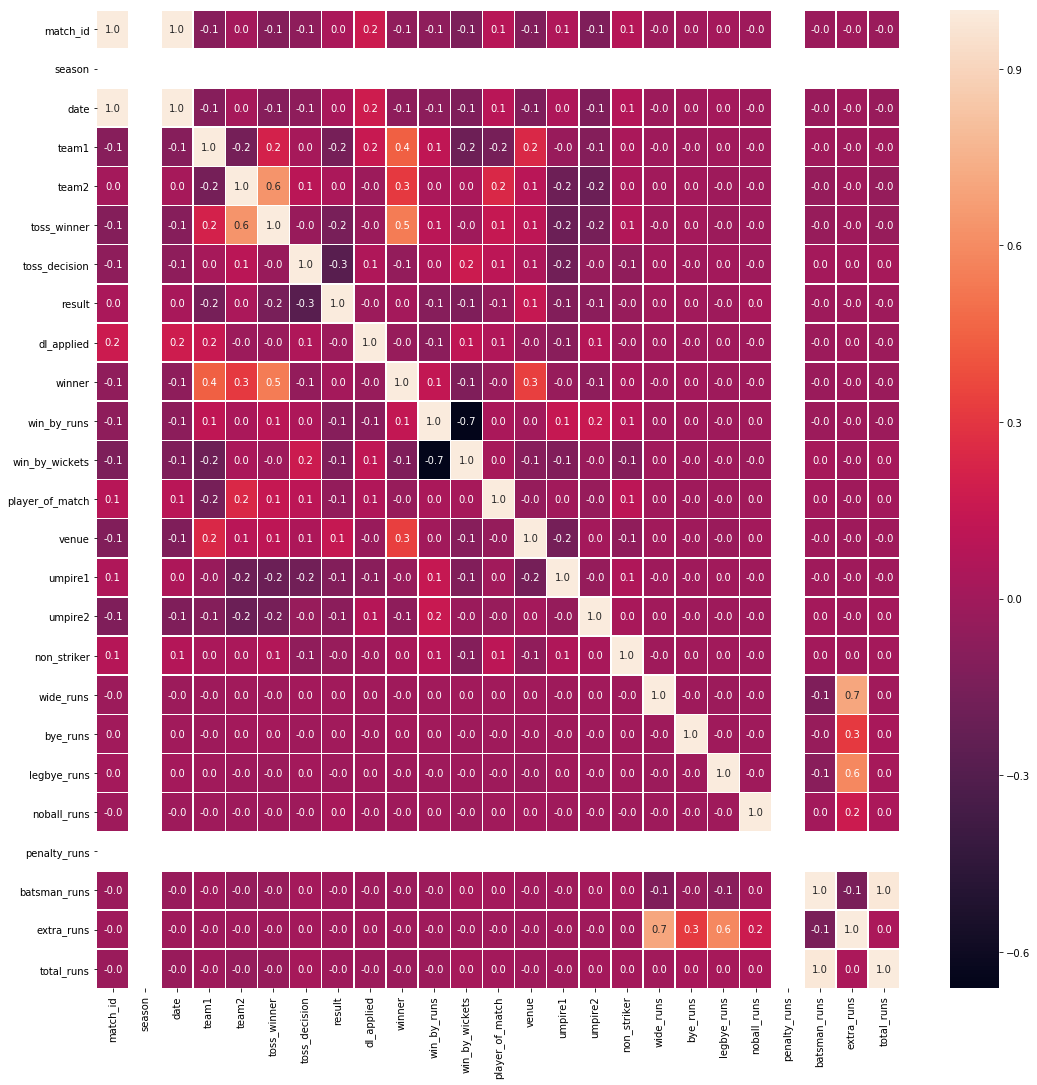

In [153]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [154]:
df1 = df1.drop(['penalty_runs','season'],axis=1)

In [156]:
df1 = df1.drop(['match_id','date','result','dl_applied','player_of_match','umpire1','umpire2','non_striker'],axis=1)

In [158]:
df1 = df1.drop(['bye_runs','legbye_runs','noball_runs','batsman_runs'],axis=1)

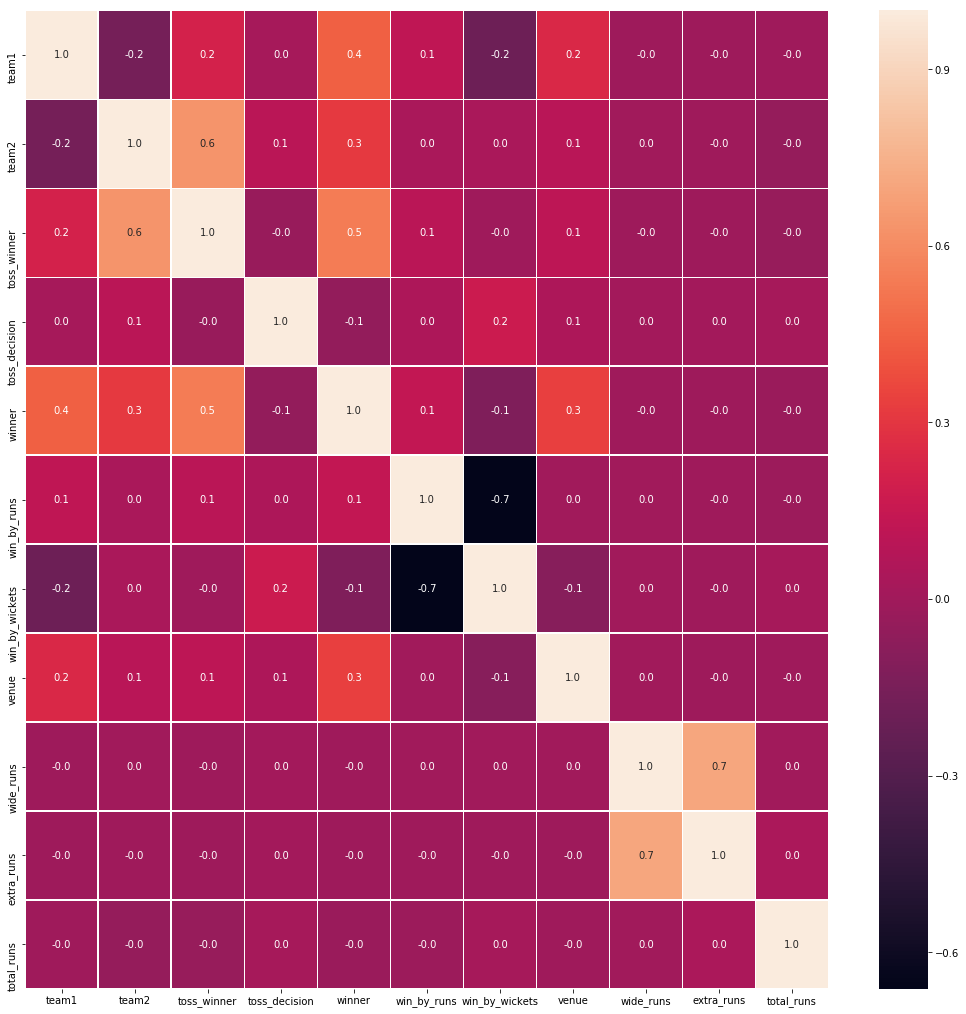

In [159]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [160]:
X= df1.drop(['winner'], axis = 1)

X.head()

team1  team2  toss_winner  toss_decision  win_by_runs  win_by_wickets  \
0      7      6            6              1           16               0   
1      7      6            6              1           16               0   
2      7      6            6              1           16               0   
3      7      6            6              1           16               0   
4      7      6            6              1           16               0   

   venue  wide_runs  extra_runs  total_runs  
0      7          0           0           0  
1      7          0           0           0  
2      7          0           0           4  
3      7          0           0           0  
4      7          2           2           2

In [169]:
pdx = pd.get_dummies(X, columns=X.columns, prefix = X.columns)

In [161]:
y = df1['winner']
y.head()

0    7
1    7
2    7
3    7
4    7
Name: winner, dtype: int64

In [162]:
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier()))

models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [170]:
results = []
names = []
for name,model in models:    
    cv_result = cross_val_score(model,pdx,y.ravel(), cv = 4,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 59.2111370069
K-Nearest Neighbour: 61.9452250641
Decision Tree: 60.2296645459
Random Forest: 66.3685282468
GradientBoostingClassifier: 65.9923278619
